# Aula 5 (21/10/2022)
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

---

# Desenvolver uma aplicação com detecção de bordas

## OpenCV: Sobel Derivatives

In [164]:
import cv2
import numpy
import matplotlib.pyplot as plt

In [165]:
src = cv2.imread("images\parkour_cat.jpg")

# Reduzir ruído com filtro gaussiano
src = cv2.GaussianBlur(src, (3, 3), 0)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Gradient-X
grad_x = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

# Gradient-Y
grad_y = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

# Converter para uint8
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

## Aproximação do gradiente total
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

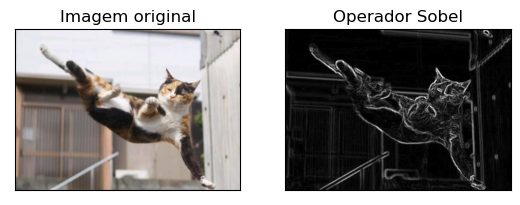

In [166]:
# Plotar todos os resultados
titles = ['Imagem original', 'Operador Sobel']
images = [src, grad]
for i in range(2):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Diferentes parâmetros;

In [167]:
# Diferente tamanho do kernel
grad_x_ksize = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=5, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
grad_y_ksize = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=5, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

# escala aplicada aos valores das derivadas
grad_x_scale = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3, scale=2, delta=0, borderType=cv2.BORDER_DEFAULT)
grad_y_scale = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=3, scale=2, delta=0, borderType=cv2.BORDER_DEFAULT)

# Valor delta adicionado aos resultados
grad_x_delta = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=50, borderType=cv2.BORDER_DEFAULT)
grad_y_delta = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=50, borderType=cv2.BORDER_DEFAULT)

# Converter para uint8
abs_grad_x_ksize = cv2.convertScaleAbs(grad_x_ksize)
abs_grad_y_ksize = cv2.convertScaleAbs(grad_y_ksize)

abs_grad_x_scale = cv2.convertScaleAbs(grad_x_scale)
abs_grad_y_scale = cv2.convertScaleAbs(grad_y_scale)

abs_grad_x_delta = cv2.convertScaleAbs(grad_x_delta)
abs_grad_y_delta = cv2.convertScaleAbs(grad_y_delta)

## Aproximação do gradiente total
grad_ksize = cv2.addWeighted(abs_grad_x_ksize, 0.5, abs_grad_y_ksize, 0.5, 0)
grad_scale = cv2.addWeighted(abs_grad_x_scale, 0.5, abs_grad_y_scale, 0.5, 0)
grad_delta = cv2.addWeighted(abs_grad_x_delta, 0.5, abs_grad_y_delta, 0.5, 0)

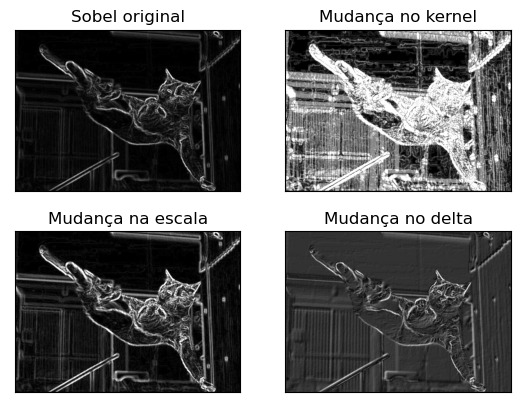

In [168]:
# Plotar todos os resultados
titles = ['Sobel original', 'Mudança no kernel', 'Mudança na escala', 'Mudança no delta']
images = [grad, grad_ksize, grad_scale, grad_delta]
for i in range(4):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## OpenCV: Canny Edge Detector

In [169]:
# Detecção de Canny no Opencv
edges = cv2.Canny(src, 50, 300)

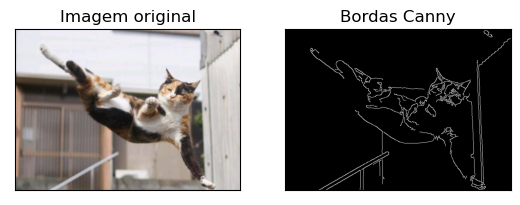

In [170]:
# Plotar todos os resultados
titles = ['Imagem original', 'Bordas Canny']
images = [src, edges]
for i in range(2):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Diferentes parâmetros

In [171]:
# Mudança de Threshold
edges_low = cv2.Canny(src, 5, 100)
edges_high = cv2.Canny(src, 200, 700)

# Diferente cálculo de norma
edges_kernel = cv2.Canny(src, 50, 300, L2gradient = True)

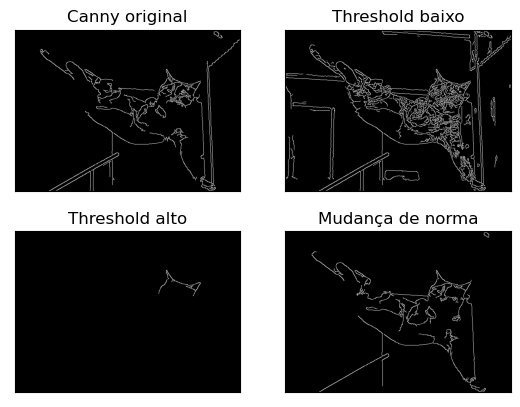

In [172]:
# Plotar todos os resultados
titles = ['Canny original', 'Threshold baixo', 'Threshold alto', 'Mudança de norma']
images = [edges, edges_low, edges_high, edges_kernel]
for i in range(4):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()